# Titanic

---

## 목적

타이타닉호의 생존률 예측

## 데이터 셋 정보 (Metadata)

The data has been split into two groups:

- **train.csv**: training data set
- **test.csv**: test data set

<img src='data/titanic_meta1.png'>

<img src='data/titanic_meta2.png'>

---

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 

# Pandas option
#pd.set_option('max_rows', 30)
#pd.set_option('max_columns', 15)

# 시각화 스타일 설정
# plt.style.use('fivethirtyeight') 
# sns.set_style('whitegrid')

#import warnings
#warnings.filterwarnings('ignore')

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 8
rcParams['axes.grid'] = True


## 데이터 분석

In [2]:
df_train = pd.read_csv('data/titanic_train.csv')
df_test = pd.read_csv('data/titanic_test.csv')

print('Train shape : ', df_train.shape)
print('Test shape : ', df_test.shape)

Train shape :  (891, 12)
Test shape :  (418, 11)


In [3]:
print('=' * 20, 'Train Data Info', '=' * 20)
df_train.info()

print('')

print('=' * 20, 'Test Data Info', '=' * 20)
df_test.info()

==================== Train Data Info ====================
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB

==================== Test Data Info ====================
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 n

In [4]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### 상관계수

In [6]:
df_train[["Survived", "Pclass", "SibSp", "Parch", "Age", "Fare"]].corr()

,Survived,Pclass,SibSp,Parch,Age,Fare
Survived,1.000000,-0.338481,-0.035322,0.081629,-0.077221,0.257307
Pclass,-0.338481,1.000000,0.083081,0.018443,-0.369226,-0.549500
SibSp,-0.035322,0.083081,1.000000,0.414838,-0.308247,0.159651
Parch,0.081629,0.018443,0.414838,1.000000,-0.189119,0.216225
Age,-0.077221,-0.369226,-0.308247,-0.189119,1.000000,0.096067
Fare,0.257307,-0.549500,0.159651,0.216225,0.096067,1.000000


### headmap

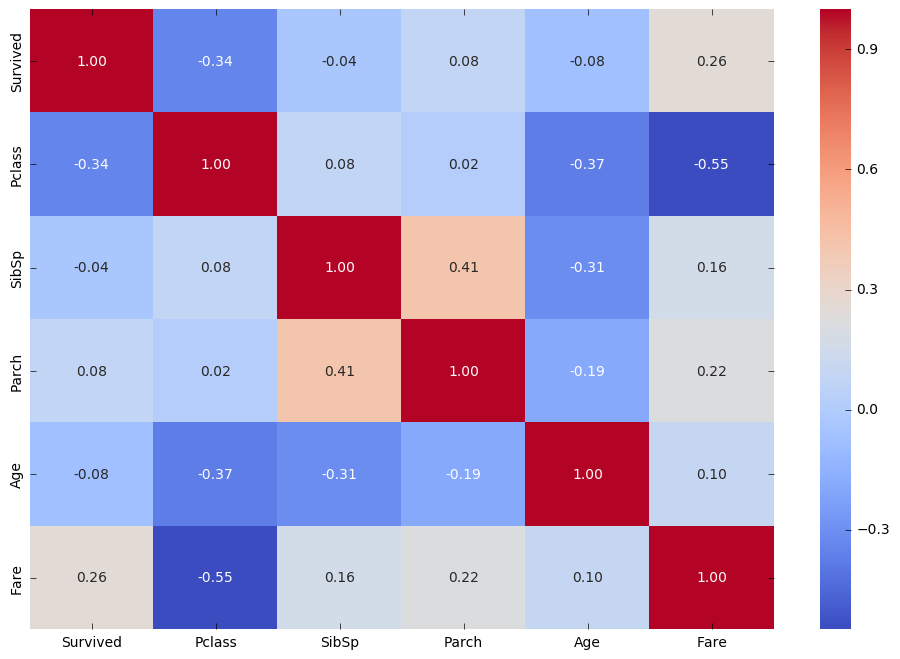

In [7]:
sns.heatmap(
    df_train[["Survived","Pclass","SibSp","Parch","Age","Fare"]].corr(),
    annot=True,
    fmt=".2f",
    cmap="coolwarm"
);

### 탑승항(Embarked)

In [8]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

####  'Embarked'에는 어떤 값들이 존재하고 각각의 값들의 개수는 몇개일까?

In [9]:
df_train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

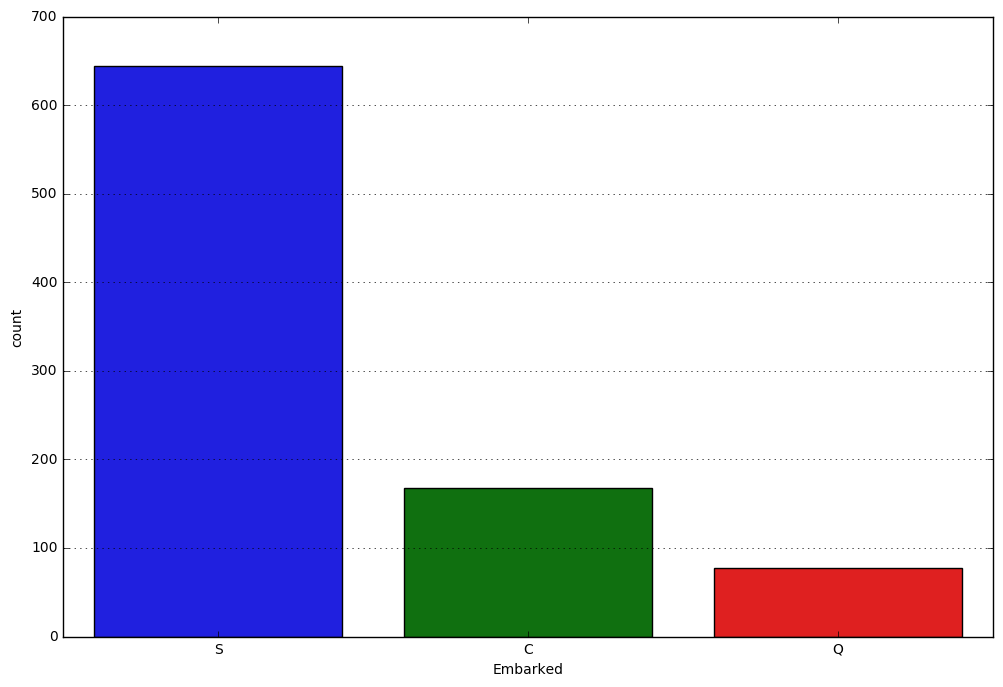

In [10]:
sns.countplot('Embarked', data=df_train)

### Embarked 결측치 채우기

In [11]:
# Embarked 비율(백분율)
df_train['Embarked'].value_counts() / df_train.shape[0] * 100

S    72.278339
C    18.855219
Q     8.641975
Name: Embarked, dtype: float64

In [12]:
df_train['Embarked'] = df_train['Embarked'].fillna('S')

In [13]:
df_train['Embarked'].isnull().any()

False

[참조: seaborn.countplot](https://seaborn.pydata.org/generated/seaborn.countplot.html)

In [ ]:
sns.countplot('Embarked', hue='Survived', data=df_train);

### Factor 별 생존율 분석

In [ ]:
df_train['Age'].hist(bins=40);

In [ ]:
sns.violinplot('Pclass', 
               'Age', 
               hue='Survived', 
               data=df_train, 
               split=True, 
               inner="quartile");

#### Pclass vs Survived: Crosstab

In [ ]:
pd.crosstab(df_train['Pclass'], df_train['Survived'], margins=True)

#### Pclass vs Survived: countplot

In [ ]:
f, ax = plt.subplots(1, 2, figsize=(12,8))

# ax[0]: matplotlib
#df_train['Pclass'].value_counts().plot.bar(ax=ax[0])
#ax[0].set_title('Number Of Passengers By Pclass')
#ax[0].set_xlabel('Pclass')
#ax[0].set_ylabel('Count')

# ax[0]: seaborn
sns.countplot('Pclass', data=df_train, ax=ax[0])
ax[0].set_title('Number Of Passengers By Pclass')

# ax[1]: seaborn
sns.countplot('Pclass', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Pclass:Survived vs Dead')

plt.show();

#### 탑승항('Embarked')별 생존자

> 1. 탑승항('Embarked')을 기준으로 승객을 분류하여
> 2. 각각의 승객의 나이에 따른 
> 3. 생존 여부를 violinplot 그래프를 이용해서 표현해보자.

In [ ]:
sns.violinplot('Embarked', 'Age', hue='Survived', data=df_train, split=True, inner="quartile")

> 1. 성별('Sex')을 기준으로 승객을 분류하여 
> 2. 각각의 승객의 나이에 따른 
> 3. 생존 여부를 그래프로 표현해보자. 

> **성별에 따른 생존율의 차이가 나타나는가?**

In [ ]:
sns.violinplot('Sex', 'Age', hue='Survived', data=df_train, split=True, inner="quartile")

> Q. **성별('Sex')에 따른 승객의 생존자 수를 crosstab으로 표현해보자. 성별에 따른 생존율의 차이가 나타나는가?**

In [ ]:
pd.crosstab(df_train['Sex'], df_train['Survived'], margins=True)

### Age 결측치 채우기

In [ ]:
# Age 결측치 비율(백분율)
df_train['Age'].isnull().sum() / len(df_train['Age']) * 100

In [ ]:
# 나이 평균
df_train['Age'].mean()

In [ ]:
# 나이 중앙값
df_train['Age'].median()

In [ ]:
# 나이 최빈값
df_train['Age'].mode()

#### 성별에 따른 나이 평균, 중앙값

In [ ]:
# 남자 나이 평균
df_train[df_train['Sex'] == 'male'].Age.mean()

In [ ]:
# 여자 나이 평균
df_train[df_train['Sex'] == 'female']['Age'].mean()

In [ ]:
# 남자 나이 중앙값
df_train[df_train['Sex']=='male']['Age'].median()

In [ ]:
# 여자 나이 중앙값
df_train[df_train['Sex']=='female']['Age'].median()

#### 선실 등급('Pclass')별 나이 중앙값

In [ ]:
df_train['Pclass'].value_counts()

In [ ]:
# Pclass 1 나이 중앙값
df_train[df_train['Pclass'] == 1]['Age'].median()

In [ ]:
# Pclass 2 나이 중앙값
df_train[df_train['Pclass']==2]['Age'].median()

In [ ]:
# Pclass 3 나이 중앙값
df_train[df_train['Pclass']==3]['Age'].median()

#### 성별(Sex), 선실 등급(Pclass)별 나이 중앙값

In [ ]:
# 나이 중앙값: 남자, Pclass 1
df_train[(df_train['Sex']=='male') & (df_train['Pclass']==1)]['Age'].median()

In [ ]:
# 나이 중앙값: 남자, Pclass 2
df_train[(df_train['Sex']=='male') & (df_train['Pclass']==2)]['Age'].median()

In [ ]:
# 나이 중앙값: 남자, Pclass 3
df_train[(df_train['Sex']=='male') & (df_train['Pclass']==3)]['Age'].median()

In [ ]:
# 나이 중앙값: 여자, Pclass 1
df_train[(df_train['Sex']=='female') & (df_train['Pclass']==1)]['Age'].median()

In [ ]:
# 나이 중앙값: 여자, Pclass 2
df_train[(df_train['Sex']=='female') & (df_train['Pclass']==2)]['Age'].median()

In [ ]:
# 나이 중앙값: 여자, Pclass 3
df_train[(df_train['Sex']=='female') & (df_train['Pclass']==3)]['Age'].median()

#### Age 결측치 채우기

In [ ]:
med_m_1 = df_train[(df_train['Sex']=='male')   & (df_train['Pclass']==1)]['Age'].median()
med_m_2 = df_train[(df_train['Sex']=='male')   & (df_train['Pclass']==2)]['Age'].median()
med_m_3 = df_train[(df_train['Sex']=='male')   & (df_train['Pclass']==3)]['Age'].median()
med_f_1 = df_train[(df_train['Sex']=='female') & (df_train['Pclass']==1)]['Age'].median()
med_f_2 = df_train[(df_train['Sex']=='female') & (df_train['Pclass']==2)]['Age'].median()
med_f_3 = df_train[(df_train['Sex']=='female') & (df_train['Pclass']==3)]['Age'].median()

In [ ]:
df_train['Age'].isnull().sum()

In [ ]:
df_train.loc[(df_train['Age'].isnull())&(df_train['Sex']=='male')  &(df_train['Pclass']==1),'Age'] = med_m_1
df_train.loc[(df_train['Age'].isnull())&(df_train['Sex']=='male')  &(df_train['Pclass']==2),'Age'] = med_m_2
df_train.loc[(df_train['Age'].isnull())&(df_train['Sex']=='male')  &(df_train['Pclass']==3),'Age'] = med_m_3
df_train.loc[(df_train['Age'].isnull())&(df_train['Sex']=='female')&(df_train['Pclass']==1),'Age'] = med_f_1
df_train.loc[(df_train['Age'].isnull())&(df_train['Sex']=='female')&(df_train['Pclass']==2),'Age'] = med_f_2
df_train.loc[(df_train['Age'].isnull())&(df_train['Sex']=='female')&(df_train['Pclass']==3),'Age'] = med_f_3

In [ ]:
df_train['Age'].isnull().sum()

In [ ]:
df_train.isnull().sum()

#### Cabin 데이터 확인

In [ ]:
df_train['Cabin'].describe()

In [ ]:
df_train['Cabin'].sample(30)

#### Cabin 삭제

In [ ]:
df_train.drop(['Cabin'], axis=1, inplace=True)

#### 생존여부와 다른 컬럼들과 연관성 파악

In [ ]:
sns.heatmap(df_train.corr(), annot=True, cmap='coolwarm', linewidths=0.2);

<img src='data/titanic_meta1.png'>

#### 삭제: PassengerId, Name, Ticket

In [ ]:
df_train.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)

> 기존 데이터 셋의 정보를 이용하여 새로운 컬럼을 추가해보자(Feature Engineering!)

#### 컬럼 추가: Fsize = SibSp + Parch

In [ ]:
df_train['Fsize'] = df_train['SibSp'] + df_train['Parch'] + 1

#### 컬럼 삭제: SibSp, Parch

In [ ]:
df_train.drop(['SibSp','Parch'], axis=1, inplace=True)

#### 상관관계 히트맵

In [ ]:
sns.heatmap(df_train.corr(), annot=True, cmap='coolwarm', linewidths=0.2);

In [ ]:
df_train.columns

In [ ]:
df_train.head()

---

## 머신러닝

### 문자열을 숫자로 치환

In [ ]:
df_train['Sex'] = df_train['Sex'].replace(['male','female'], [0, 1])
df_train['Embarked'] = df_train['Embarked'].replace(['S','C','Q'], [0, 1, 2])

In [ ]:
sns.heatmap(df_train.corr(), annot=True, cmap='coolwarm', linewidths=0.2);

### 생존여부 예측

In [ ]:
# Machine Learning Library

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split

# accuracy measure
from sklearn import metrics

#### 데이터 분리: 학습 데이터 + 테스트 데이터

In [ ]:
train, test = train_test_split(
    df_train, test_size=0.3, random_state=123, stratify=df_train['Survived'])
train.head()
test.head()

#### 학습 데이터

In [ ]:
# 독립변수(Feature)
X_train = train[train.columns[1:]]

# 종속변수(Target): Survived(1 or 0)
y_train = train[train.columns[:1]]

X_train.head()

#### 테스트 데이터

In [ ]:
# 독립변수(Feature)
X_test = test[test.columns[1:]]
#X_test = test.iloc[:,1:]

# 종속변수(Target): Survived(1 or 0)
y_test = test[test.columns[:1]]

X_test.head()

#### 1. Logistic Regression

In [ ]:
# 모델 생성
model = LogisticRegression()

In [ ]:
# 모델 학습
#model.fit(X_train, y_train)
model.fit(X_train, y_train.values.ravel())

In [ ]:
# 결과 예측
prediction1 = model.predict(X_test)
prediction1

In [ ]:
# 정확도 확인
print('Accuracy - Logistic Regression:', metrics.accuracy_score(prediction1, y_test))

In [ ]:
# Score - precision, recall, f1-score
print(metrics.classification_report(y_test, prediction1))

In [ ]:
# Confusion Matrix
pd.crosstab(prediction1, y_test['Survived'], margins=True)

#### 2. Support Vector Machine

In [ ]:
# 모델 생성
model = SVC(kernel='linear', C=0.1, gamma=0.1)

In [ ]:
# 모델 학습
#model.fit(X_train, y_train)
model.fit(X_train, y_train.values.ravel())

In [ ]:
# 결과 예측
prediction2 = model.predict(X_test)
prediction2

In [ ]:
# 정확도 확인
print('Accuracy - SVM:', metrics.accuracy_score(prediction2, y_test))

In [ ]:
# Score - precision, recall, f1-score
print(metrics.classification_report(y_test, prediction2))

In [ ]:
# Confusion Matrix
pd.crosstab(prediction2, y_test['Survived'], margins=True)

#### 3. Decision Tree

In [ ]:
# 모델 생성
model = DecisionTreeClassifier()

In [ ]:
# 모델 학습
model.fit(X_train, y_train)

In [ ]:
# 결과 예측
prediction3 = model.predict(X_test)
prediction3

In [ ]:
# 정확도 확인
print('Accuracy - Decision Tree:', metrics.accuracy_score(prediction3, y_test))

In [ ]:
# Score - precision, recall, f1-score
print(metrics.classification_report(y_test, prediction3))

In [ ]:
# Confusion Matrix
pd.crosstab(prediction3, y_test['Survived'], margins=True)

#### 4. Random Forest

In [ ]:
# 모델 생성
model = RandomForestClassifier(n_estimators=340)

In [ ]:
# 모델 학습
#model.fit(X_train, y_train)
model.fit(X_train, y_train.values.ravel())

In [ ]:
# 결과 예측
prediction4 = model.predict(X_test)
prediction4

In [ ]:
# 정확도 확인
print('Accuracy - Random Forests:', metrics.accuracy_score(prediction4, y_test))

In [ ]:
# Score - precision, recall, f1-score
print(metrics.classification_report(y_test, prediction4))

In [ ]:
# Confusion Matrix
pd.crosstab(prediction4, y_test['Survived'], margins=True)

#### 5. 하이퍼 파라미터 튜닝(매개변수 최적화)

In [ ]:
# 학습 데이터와 테스트 데이터를 나누지 않음

X = df_train[df_train.columns[1:]]
#X = df_train.iloc[:,1:]

y = df_train['Survived']

In [ ]:
# Grid Search
from sklearn.model_selection import GridSearchCV

In [ ]:
# 매개 변수 설정
n_estimators = range(10, 500, 10)
hyperparam = {'n_estimators': n_estimators}

In [ ]:
# 모델 생성
gs = GridSearchCV(estimator=RandomForestClassifier(random_state=123), param_grid=hyperparam, cv=2)

In [ ]:
%%time
# 모델 학습
gs.fit(X,y)

In [ ]:
# 모델 성능 확인
gs.best_score_

In [ ]:
# 최적의 매개변수 확인
gs.best_estimator_

In [ ]:
# end of file